In [5]:
import tensorflow as tf
from scipy.io import loadmat
import matplotlib.pyplot as plt
import random
import os
import numpy as np
import imageio
import random
import pickle

tf.keras.backend.set_floatx('float64')
large_mnist = "../Lab 1/notMNIST_large"
small_mnist = "../Lab 1/notMNIST_small"

# Load data

Train data size: 194419. Val data size: 10000. Test data size: 19000


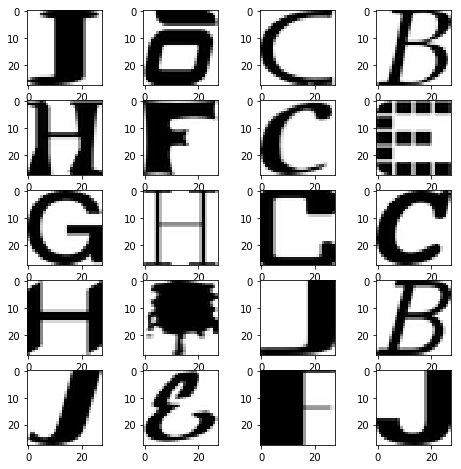

In [6]:
def load_data():
    return load_from_pickle("_train.pickle"), load_from_pickle("_val.pickle"), load_from_pickle("_test.pickle")

def load_from_pickle(pickle_name):
    with open(large_mnist + pickle_name, 'rb') as f:
        return pickle.load(f)
    
train_data, val_data, test_data = load_data()
print("Train data size: %d. Val data size: %d. Test data size: %d" % (len(train_data), len(val_data), len(test_data)))

fig = plt.figure(figsize=(8, 8))
columns, rows = 4, 5
for i in range(1, columns * rows + 1):
    img = random.choice(train_data)[0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img.reshape(28, 28), interpolation='nearest', cmap='Greys')
plt.show()

In [11]:
def unzip(tuples):
    first = [t[0] for t in tuples]
    second = [t[1] for t in tuples]
    return np.array(first), np.array(second)

train_x, train_y = unzip(train_data)
val_x, val_y = unzip(val_data)
test_x, test_y = unzip(test_data)

train_x = train_x.reshape((len(train_x), 28, 28, 1))
val_x = val_x.reshape((len(val_x), 28, 28, 1))
test_x = test_x.reshape((len(test_x), 28, 28, 1))

In [17]:
from tensorflow.keras import layers, Model, Input, Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten

num_classes = 10
model = Sequential([
    Conv2D(32, (4, 4), input_shape=(28, 28, 1,)),
    Conv2D(64, (2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(num_classes, activation="softmax")
])
    
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        8256      
_________________________________________________________________
flatten_4 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               4718720   
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 4,728,810
Trainable params: 4,728,810
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(train_x, train_y, epochs=8, batch_size=32, validation_data=(val_x, val_y))

Train on 194419 samples, validate on 10000 samples
Epoch 1/3
194419/194419 [==============================] - 281s 1ms/sample - loss: 0.2905 - accuracy: 0.9117 - val_loss: 0.4289 - val_accuracy: 0.8806
Epoch 2/3
194419/194419 [==============================] - 253s 1ms/sample - loss: 0.2723 - accuracy: 0.9172 - val_loss: 0.4589 - val_accuracy: 0.8839
Epoch 3/3
194419/194419 [==============================] - 254s 1ms/sample - loss: 0.2574 - accuracy: 0.9210 - val_loss: 0.5442 - val_accuracy: 0.8791


19000/19000 [==============================] - 7s 348us/sample - loss: 0.5605 - accuracy: 0.8787
[0.5604870057387776, 0.8787368421052631]


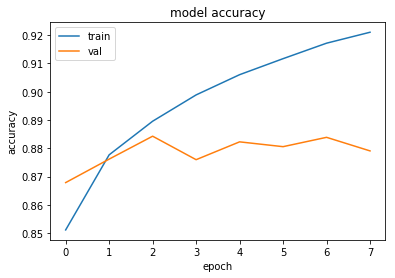

In [25]:
first_score = model.evaluate(test_x, test_y)
print(first_score)

def plot_history(training_history):
    plt.plot(training_history.history['accuracy'])
    plt.plot(training_history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
plot_history(history)

## Add pooling

In [28]:
from tensorflow.keras.layers import MaxPooling2D

model = Sequential([
    Conv2D(64, (4, 4), input_shape=(28, 28, 1,)),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(num_classes, activation="softmax")
])
    
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 25, 25, 64)        1088      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 1,182,154
Trainable params: 1,182,154
Non-trainable params: 0
____________________________________________

In [29]:
history = model.fit(train_x, train_y, epochs=5, batch_size=32, validation_data=(val_x, val_y))

Train on 194419 samples, validate on 10000 samples
Epoch 1/5
194419/194419 [==============================] - 418s 2ms/sample - loss: 0.4429 - accuracy: 0.8689 - val_loss: 0.3731 - val_accuracy: 0.8932
Epoch 2/5
194419/194419 [==============================] - 405s 2ms/sample - loss: 0.3386 - accuracy: 0.8987 - val_loss: 0.3344 - val_accuracy: 0.9020
Epoch 3/5
194419/194419 [==============================] - 405s 2ms/sample - loss: 0.2994 - accuracy: 0.9094 - val_loss: 0.3349 - val_accuracy: 0.9021
Epoch 4/5
194419/194419 [==============================] - 406s 2ms/sample - loss: 0.2715 - accuracy: 0.9167 - val_loss: 0.3180 - val_accuracy: 0.9092
Epoch 5/5
194419/194419 [==============================] - 402s 2ms/sample - loss: 0.2475 - accuracy: 0.9232 - val_loss: 0.3340 - val_accuracy: 0.9066


19000/19000 [==============================] - 3s 144us/sample - loss: 0.3361 - accuracy: 0.9062
[0.3361028025873167, 0.9062105263157895]


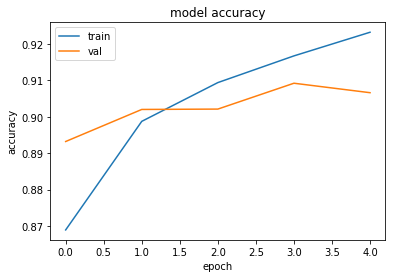

In [33]:
second_score = model.evaluate(test_x, test_y)
print(second_score)
plot_history(history)

# LeNet-5 Model

In [34]:
from tensorflow.keras.layers import AveragePooling2D

model = Sequential([
    Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(28, 28, 1), padding="same"),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'),
    AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'),
    Flatten(),
    Dense(120, activation="relu"),
    Dropout(0.5),
    Dense(84, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])


model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 120)               48120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)              

In [38]:
history = model.fit(train_x, train_y, epochs=10, batch_size=32, validation_data=(val_x, val_y))

Train on 194419 samples, validate on 10000 samples
Epoch 1/10
194419/194419 [==============================] - 55s 283us/sample - loss: 0.3581 - accuracy: 0.8905 - val_loss: 0.3028 - val_accuracy: 0.9091
Epoch 2/10
194419/194419 [==============================] - 55s 282us/sample - loss: 0.3563 - accuracy: 0.8918 - val_loss: 0.2951 - val_accuracy: 0.9102
Epoch 3/10
194419/194419 [==============================] - 55s 282us/sample - loss: 0.3549 - accuracy: 0.8914 - val_loss: 0.2971 - val_accuracy: 0.9115
Epoch 4/10
194419/194419 [==============================] - 55s 283us/sample - loss: 0.3537 - accuracy: 0.8922 - val_loss: 0.3001 - val_accuracy: 0.9089
Epoch 5/10
194419/194419 [==============================] - 55s 284us/sample - loss: 0.3513 - accuracy: 0.8927 - val_loss: 0.2991 - val_accuracy: 0.9099
Epoch 6/10
194419/194419 [==============================] - 55s 283us/sample - loss: 0.3502 - accuracy: 0.8933 - val_loss: 0.3044 - val_accuracy: 0.9103
Epoch 7/10
194419/194419 [=====

19000/19000 [==============================] - 3s 152us/sample - loss: 0.3076 - accuracy: 0.9065
[0.30760517516909314, 0.9065263157894737]


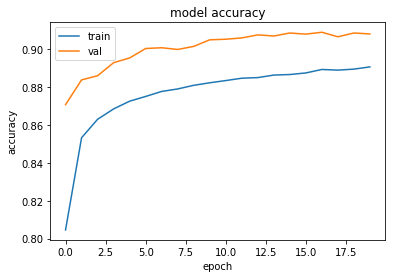

In [37]:
third_score = model.evaluate(test_x, test_y)
print(third_score)
plot_history(history)

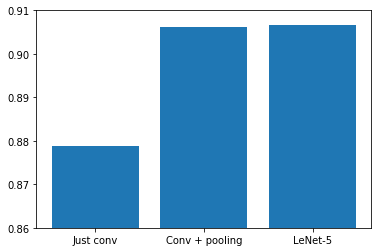

In [43]:
plt.bar(["Just conv", "Conv + pooling", "LeNet-5"], [first_score[1], second_score[1], third_score[1]])
plt.ylim((0.86, 0.91))
plt.show()